## Data Preprocessing

In [ ]:
import pandas as pd

# Load the dataset (adjust the filename if necessary)
df = pd.read_csv('https://www.dropbox.com/scl/fi/alydkzx7stzpgk1ad8slv/WA_Fn-UseC_-Telco-Customer-Churn.csv?rlkey=6z4csryifaf0m89q4uup34a4r&st=ycb2nw9d&dl=1')

# Display the first few rows to verify it loaded correctly
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert 'TotalCharges' from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Check how many NaN values we have in 'TotalCharges'
num_missing = df['TotalCharges'].isnull().sum()
print(f"Number of NaN values in TotalCharges after conversion: {num_missing}")



Number of NaN values in TotalCharges after conversion: 11


In [ ]:
if num_missing > 0:
    df = df.dropna(subset=['TotalCharges'])
    print("Dropped rows with NaN in TotalCharges.")

# Verify the conversion
df.info()

Dropped rows with NaN in TotalCharges.
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  Paperles

In [ ]:
# Check for missing values
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

0

## **EDA**

In [ ]:
# Count the occurrences of each class in the Churn column
churn_counts = df['Churn'].value_counts()
print(churn_counts)



Churn
No     5163
Yes    1869
Name: count, dtype: int64


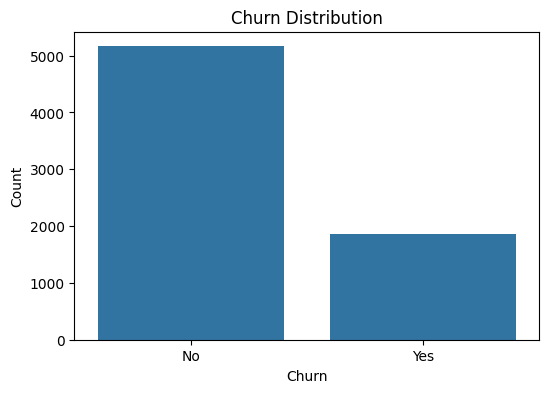

In [ ]:
# Visualize the distribution using a count plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


In [ ]:
# Display descriptive statistics for key numerical features
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


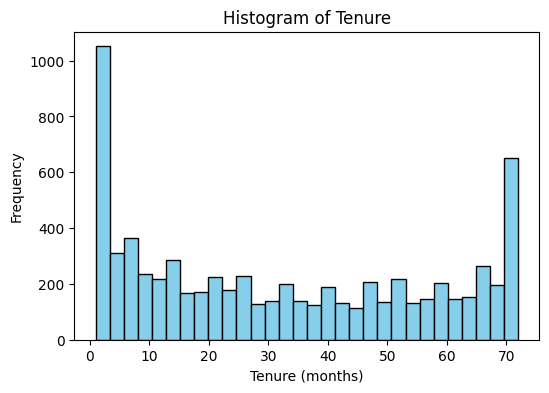

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.show()



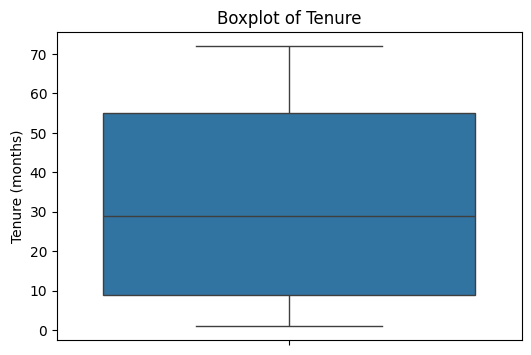

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='tenure', data=df)
plt.title("Boxplot of Tenure")
plt.ylabel("Tenure (months)")
plt.show()


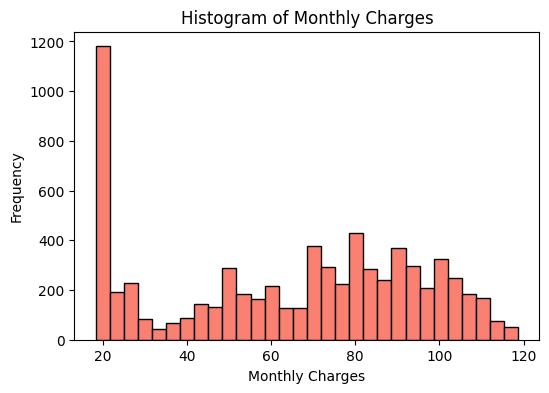

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['MonthlyCharges'], bins=30, color='salmon', edgecolor='black')
plt.title("Histogram of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()


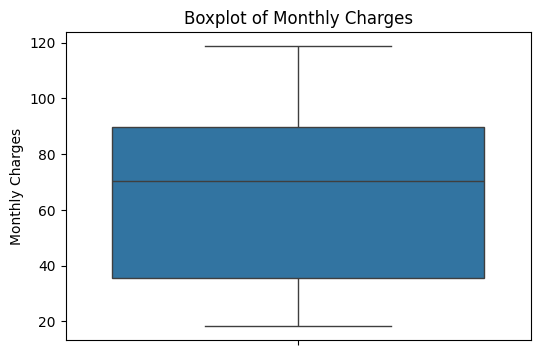

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='MonthlyCharges', data=df)
plt.title("Boxplot of Monthly Charges")
plt.ylabel("Monthly Charges")
plt.show()


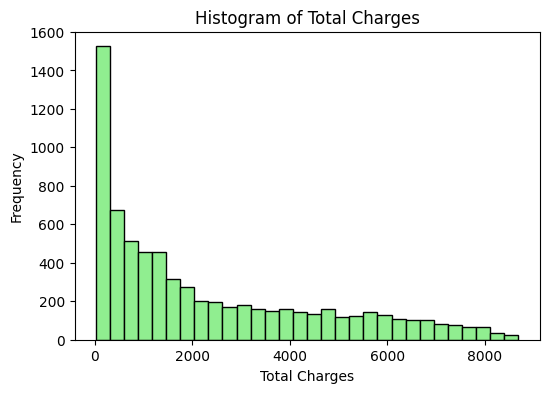

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['TotalCharges'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Histogram of Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()


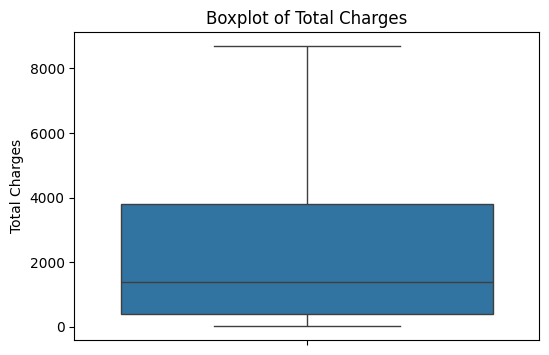

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='TotalCharges', data=df)
plt.title("Boxplot of Total Charges")
plt.ylabel("Total Charges")
plt.show()


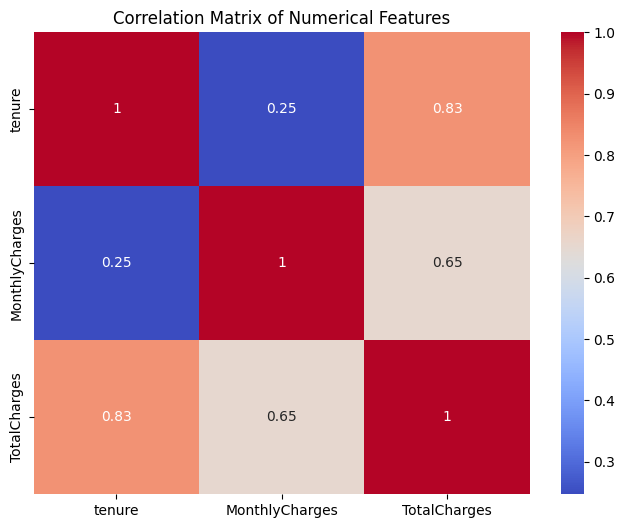

In [ ]:
# Let's include SeniorCitizen along with tenure, MonthlyCharges, and TotalCharges
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


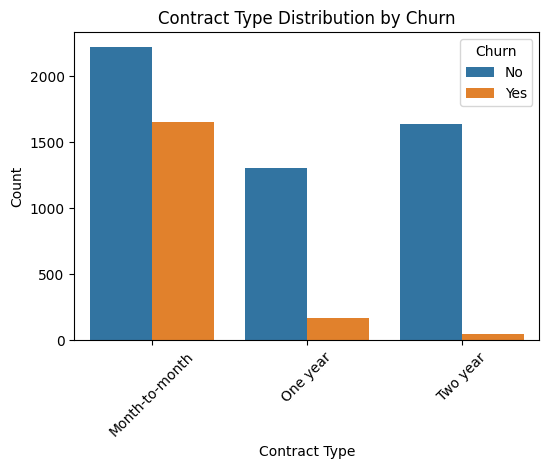

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title("Contract Type Distribution by Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


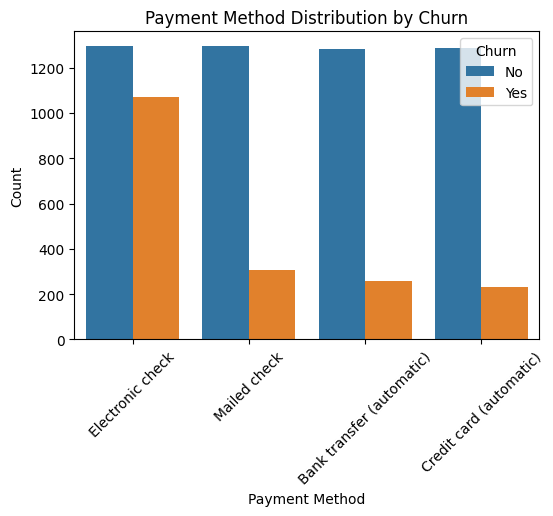

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.title("Payment Method Distribution by Churn")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Model Building and Evaluation

### Feature Engineering

In [ ]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
columns_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingMovies','StreamingTV']
for col in columns_to_fix:
    df[col] = df[col].replace('No internet service', 'No')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Drop 'customerID' as it's irrelevant for modeling
df.drop(columns=['customerID','gender'], inplace=True)

# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable 'Churn' from categorical features
categorical_cols.remove('Churn')

# 🔹 Label Encoding for Binary Categorical Columns (Yes/No)
binary_cols = ['MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingMovies','StreamingTV','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 🔹 Label Encoding for Target Variable (Churn)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 🔹 One-Hot Encoding for Multi-class Categorical Variables
multi_class_cols = list(set(categorical_cols) - set(binary_cols))  # Remaining categorical columns
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# ✅ Display the final dataset
df.head()




,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


In [ ]:
# ✅ Check the final column names to ensure encoding is correct
print(df.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
#Calculate Max prior to scaling
max_tenure = df['tenure'].max()

# Define bins and labels for tenure grouping
bins = [0, 12, 36, max_tenure]
labels = ['New', 'Experienced', 'Loyal']

# Create new tenure group column
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# One-hot encode TenureGroup
df = pd.get_dummies(df, columns=['TenureGroup'], drop_first=True)


# Check new column
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Experienced,TenureGroup_Loyal
0,0,1,0,1,0,0,0,1,0,0,...,0,False,False,False,False,False,True,False,False,False
1,0,0,0,34,1,0,1,0,1,0,...,0,False,False,True,False,False,False,True,True,False
2,0,0,0,2,1,0,1,1,0,0,...,1,False,False,False,False,False,False,True,False,False
3,0,0,0,45,0,0,1,0,1,1,...,0,False,False,True,False,False,False,False,False,True
4,0,0,0,2,1,0,0,0,0,0,...,1,True,False,False,False,False,True,False,False,False


In [ ]:
# Drop unnecessary columns
columns_to_drop = ['tenure']
df.drop(columns=columns_to_drop, inplace=True)

# Check the dataset after feature selection
print(f"Final Shape of Data: {df.shape}")
df.head()



Final Shape of Data: (7032, 24)


,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Experienced,TenureGroup_Loyal
0,0,1,0,0,0,0,1,0,0,0,...,0,False,False,False,False,False,True,False,False,False
1,0,0,0,1,0,1,0,1,0,0,...,0,False,False,True,False,False,False,True,True,False
2,0,0,0,1,0,1,1,0,0,0,...,1,False,False,False,False,False,False,True,False,False
3,0,0,0,0,0,1,0,1,1,0,...,0,False,False,True,False,False,False,False,False,True
4,0,0,0,1,0,0,0,0,0,0,...,1,True,False,False,False,False,True,False,False,False


In [ ]:
df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Experienced,TenureGroup_Loyal
0,0,1,0,0,0,0,1,0,0,0,...,0,False,False,False,False,False,True,False,False,False
1,0,0,0,1,0,1,0,1,0,0,...,0,False,False,True,False,False,False,True,True,False
2,0,0,0,1,0,1,1,0,0,0,...,1,False,False,False,False,False,False,True,False,False
3,0,0,0,0,0,1,0,1,1,0,...,0,False,False,True,False,False,False,False,False,True
4,0,0,0,1,0,0,0,0,0,0,...,1,True,False,False,False,False,True,False,False,False


In [ ]:
# Convert boolean one-hot encoded columns to integer (0/1)
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

# Check dataset again
df.head()


,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Experienced,TenureGroup_Loyal
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0


### Base Model ( Logistic Regression )

In [ ]:
from sklearn.model_selection import train_test_split

# Separate Features (X) and Target (y)
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Split the data into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (5625, 23), Testing set: (1407, 23)


In [ ]:
# Select only numerical columns that need scaling (excluding Churn and binary columns)
num_cols_to_scale = ['MonthlyCharges', 'TotalCharges']  # tenure was removed


# 🔹 Apply StandardScaler AFTER splitting
scaler = StandardScaler()
X_train[num_cols_to_scale] = scaler.fit_transform(X_train[num_cols_to_scale])  # Fit & transform training data
X_test[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])  # Transform test data (no fitting)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model Performance
accuracy_log_reg = accuracy_score(y_test, y_pred)
precision_log_reg = precision_score(y_test, y_pred)
recall_log_reg = recall_score(y_test, y_pred)
f1_log_reg = f1_score(y_test, y_pred)

# Display Results
print(f"📊 Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}")



📊 Logistic Regression Performance:
Accuracy: 0.7932
Precision: 0.6370
Recall: 0.5160
F1 Score: 0.5702


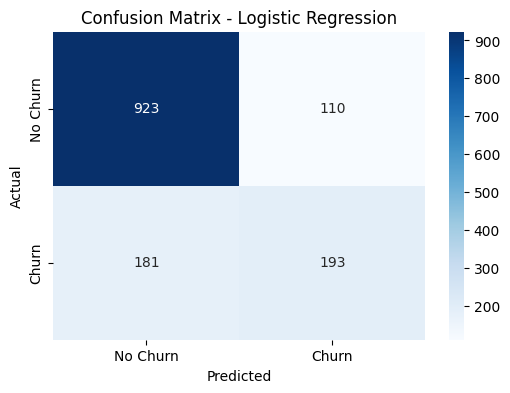

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Logistic Regression with Class Weights

In [ ]:
# Train Logistic Regression with Class Weights
log_reg_balanced = LogisticRegression(random_state=42, max_iter=500, class_weight='balanced')
log_reg_balanced.fit(X_train, y_train)

# Predictions
y_pred_balanced = log_reg_balanced.predict(X_test)

# Evaluate Performance
accuracy_log_reg_balanced = accuracy_score(y_test, y_pred_balanced)
precision_log_reg_balanced = precision_score(y_test, y_pred_balanced)
recall_log_reg_balanced = recall_score(y_test, y_pred_balanced)
f1_log_reg_balanced = f1_score(y_test, y_pred_balanced)

# Display Results
print(f"📊 Logistic Regression with Balanced Class Weights:")
print(f"Accuracy: {accuracy_log_reg_balanced:.4f}")
print(f"Precision: {precision_log_reg_balanced:.4f}")
print(f"Recall: {recall_log_reg_balanced:.4f}")  # Expected to improve
print(f"F1 Score: {f1_log_reg_balanced:.4f}")




📊 Logistic Regression with Balanced Class Weights:
Accuracy: 0.7228
Precision: 0.4866
Recall: 0.7781
F1 Score: 0.5988


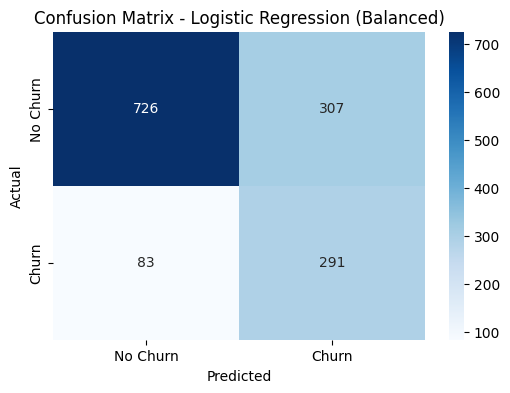

In [ ]:
# Confusion Matrix Heatmap
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(6,4))
sns.heatmap(cm_balanced, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Balanced)")
plt.show()

### Random Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print(f"After SMOTE: {y_train_resampled.value_counts()}")


After SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Logistic Regression model
log_reg_with_SMOTE = LogisticRegression(random_state=42, max_iter=500)

# Train the model
log_reg_with_SMOTE.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = log_reg_with_SMOTE.predict(X_test)

# Evaluate Model Performance
accuracy_log_reg_with_SMOTE = accuracy_score(y_test, y_pred)
precision_log_reg_with_SMOTE = precision_score(y_test, y_pred)
recall_log_reg_with_SMOTE = recall_score(y_test, y_pred)
f1_log_reg_with_SMOTE = f1_score(y_test, y_pred)

# Display Results
print(f"📊 Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg_with_SMOTE:.4f}")
print(f"Precision: {precision_log_reg_with_SMOTE:.4f}")
print(f"Recall: {recall_log_reg_with_SMOTE:.4f}")
print(f"F1 Score: {f1_log_reg_with_SMOTE:.4f}")



📊 Logistic Regression Performance:
Accuracy: 0.7420
Precision: 0.5104
Recall: 0.7246
F1 Score: 0.5989


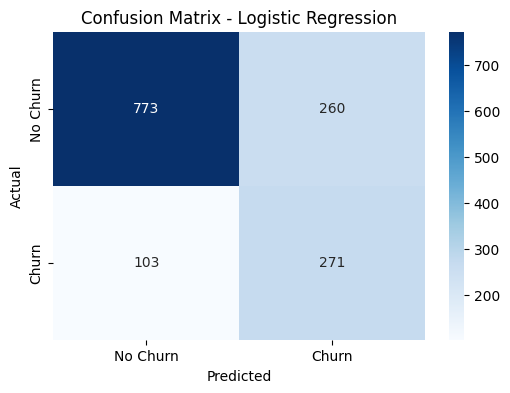

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Random Forest

In [ ]:
# Use unscaled features for Random Forest
X_train_original = df.drop(columns=['Churn'])
y_train_original = df['Churn']

# Split again (without scaling)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_train_original, y_train_original, test_size=0.2, random_state=42, stratify=y_train_original)

# Train Random Forest on unscaled data
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_base.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_rf = rf_base.predict(X_test_rf)

# Evaluate Performance
accuracy_rf_base = accuracy_score(y_test_rf, y_pred_rf)
precision_rf_base = precision_score(y_test_rf, y_pred_rf)
recall_rf_base = recall_score(y_test_rf, y_pred_rf)
f1_rf_base = f1_score(y_test_rf, y_pred_rf)

# Display Results
print(f"📊 Random Forest Performance:")
print(f"Accuracy: {accuracy_rf_base:.4f}")
print(f"Precision: {precision_rf_base:.4f}")
print(f"Recall: {recall_rf_base:.4f}")
print(f"F1 Score: {f1_rf_base:.4f}")



📊 Random Forest Performance:
Accuracy: 0.7846
Precision: 0.6187
Recall: 0.4947
F1 Score: 0.5498


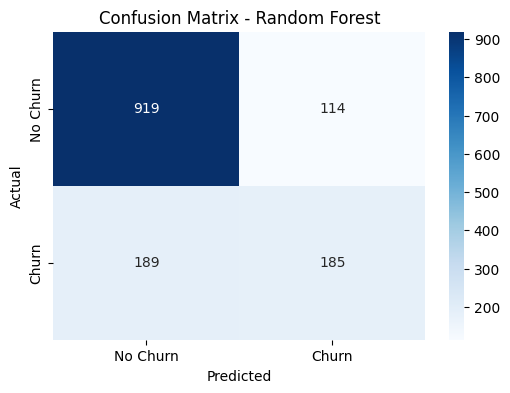

In [ ]:
# Confusion Matrix Heatmap
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


### Applying Class Weights in Random Forest

In [ ]:
# Class weight calculation (inverse of class frequencies)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_rf), y=y_train_rf)
weights_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class Weights: {weights_dict}")

# Train Random Forest with manual class weights
rf_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=weights_dict)
rf_weighted.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_rf_weighted = rf_weighted.predict(X_test_rf)

# Evaluate Performance
accuracy_rf_w = accuracy_score(y_test_rf, y_pred_rf_weighted)
precision_rf_w = precision_score(y_test_rf, y_pred_rf_weighted)
recall_rf_w = recall_score(y_test_rf, y_pred_rf_weighted)
f1_rf_w = f1_score(y_test_rf, y_pred_rf_weighted)

# Display Results
print(f"📊 Random Forest with Custom Class Weights:")
print(f"Accuracy: {accuracy_rf_w:.4f}")
print(f"Precision: {precision_rf_w:.4f}")
print(f"Recall: {recall_rf_w:.4f}")
print(f"F1 Score: {f1_rf_w:.4f}")


Class Weights: {0: 0.6809927360774818, 1: 1.8812709030100334}
📊 Random Forest with Custom Class Weights:
Accuracy: 0.7846
Precision: 0.6187
Recall: 0.4947
F1 Score: 0.5498


### Applying SMOTE to Random Forest

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote_rf = SMOTE(random_state=42)
X_train_rf_smote, y_train_rf_smote = smote_rf.fit_resample(X_train_rf, y_train_rf)

# Train Random Forest on SMOTE data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_rf_smote, y_train_rf_smote)

# Predictions
y_pred_rf_smote = rf_smote.predict(X_test_rf)

# Evaluate Performance
accuracy_rf_smote = accuracy_score(y_test_rf, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test_rf, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test_rf, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test_rf, y_pred_rf_smote)

# Display Results
print(f"📊 Random Forest with SMOTE:")
print(f"Accuracy: {accuracy_rf_smote:.4f}")
print(f"Precision: {precision_rf_smote:.4f}")
print(f"Recall: {recall_rf_smote:.4f}")
print(f"F1 Score: {f1_rf_smote:.4f}")


📊 Random Forest with SMOTE:
Accuracy: 0.7790
Precision: 0.5782
Recall: 0.6230
F1 Score: 0.5997


### XGBoost

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost on unscaled data
xgb_base = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=(5163 / 1869))
xgb_base.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_xgb = xgb_base.predict(X_test_rf)

# Evaluate Performance
accuracy_xgb_base = accuracy_score(y_test_rf, y_pred_xgb)
precision_xgb_base = precision_score(y_test_rf, y_pred_xgb)
recall_xgb_base = recall_score(y_test_rf, y_pred_xgb)
f1_xgb_base = f1_score(y_test_rf, y_pred_xgb)

# Display Results
print(f"📊 XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb_base:.4f}")
print(f"Precision: {precision_xgb_base:.4f}")
print(f"Recall: {recall_xgb_base:.4f}")
print(f"F1 Score: {f1_xgb_base:.4f}")



📊 XGBoost Performance:
Accuracy: 0.7576
Precision: 0.5333
Recall: 0.7059
F1 Score: 0.6076


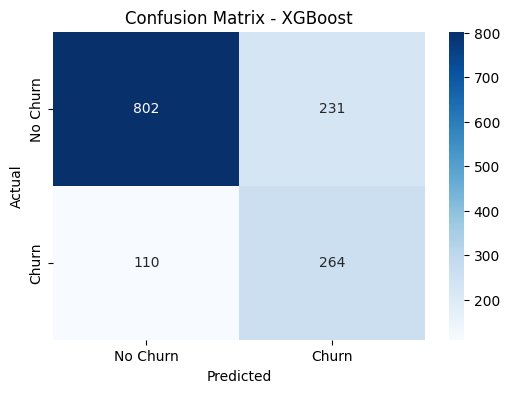

In [ ]:
# Confusion Matrix Heatmap
cm_xgb = confusion_matrix(y_test_rf, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


### Applying SMOTE to XGBoost

In [ ]:
from xgboost import XGBClassifier
# Apply SMOTE to training data for XGBoost
X_train_xgb_smote, y_train_xgb_smote = smote_rf.fit_resample(X_train_rf, y_train_rf)

# Train XGBoost on SMOTE data
xgb_smote = XGBClassifier(n_estimators=100, random_state=42)
xgb_smote.fit(X_train_xgb_smote, y_train_xgb_smote)

# Predictions
y_pred_xgb_smote = xgb_smote.predict(X_test_rf)

# Evaluate Performance
accuracy_xgb_smote = accuracy_score(y_test_rf, y_pred_xgb_smote)
precision_xgb_smote = precision_score(y_test_rf, y_pred_xgb_smote)
recall_xgb_smote = recall_score(y_test_rf, y_pred_xgb_smote)
f1_xgb_smote = f1_score(y_test_rf, y_pred_xgb_smote)

# Display Results
print(f"📊 XGBoost with SMOTE:")
print(f"Accuracy: {accuracy_xgb_smote:.4f}")
print(f"Precision: {precision_xgb_smote:.4f}")
print(f"Recall: {recall_xgb_smote:.4f}")
print(f"F1 Score: {f1_xgb_smote:.4f}")


📊 XGBoost with SMOTE:
Accuracy: 0.7598
Precision: 0.5452
Recall: 0.5802
F1 Score: 0.5622


### Hyperparameter Tuning using RandomSearchCV for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters for tuning
rf_params = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
}

# Randomized Search with 5-fold cross-validation
rf_tuned = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=10, cv=5, n_jobs=-1, scoring='f1', random_state=42)
rf_tuned.fit(X_train_rf_smote, y_train_rf_smote)

# Best parameters
print(f"Best Parameters for Random Forest: {rf_tuned.best_params_}")

# Train best model
best_rf = rf_tuned.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_rf)

# Evaluate Performance
accuracy_rf_tuned = accuracy_score(y_test_rf, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test_rf, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test_rf, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test_rf, y_pred_rf_tuned)

# Display Results
print(f"📊 Tuned Random Forest Performance:")
print(f"Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Precision: {precision_rf_tuned:.4f}")
print(f"Recall: {recall_rf_tuned:.4f}")
print(f"F1 Score: {f1_rf_tuned:.4f}")


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
📊 Tuned Random Forest Performance:
Accuracy: 0.7569
Precision: 0.5328
Recall: 0.6952
F1 Score: 0.6032


### Hyperparameter Tuning using RandomSearchCV for XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters for tuning
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Randomized Search with 5-fold cross-validation
xgb_tuned = RandomizedSearchCV(XGBClassifier(random_state=42), xgb_params, n_iter=10, cv=5, n_jobs=-1, scoring='f1', random_state=42)
xgb_tuned.fit(X_train_xgb_smote, y_train_xgb_smote)

# Best parameters
print(f"Best Parameters for XGBoost: {xgb_tuned.best_params_}")

# Train best model
best_xgb = xgb_tuned.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test_rf)

# Evaluate Performance
accuracy_xgb_tuned = accuracy_score(y_test_rf, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test_rf, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test_rf, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test_rf, y_pred_xgb_tuned)

# Display Results
print(f"📊 Tuned XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb_tuned:.4f}")
print(f"Precision: {precision_xgb_tuned:.4f}")
print(f"Recall: {recall_xgb_tuned:.4f}")
print(f"F1 Score: {f1_xgb_tuned:.4f}")


Best Parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
📊 Tuned XGBoost Performance:
Accuracy: 0.7662
Precision: 0.5513
Recall: 0.6471
F1 Score: 0.5953


### Fine-Tuning Random Forest with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define refined parameter grid
rf_grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}

# Perform Grid Search
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid_params, cv=5, n_jobs=-1, scoring='f1')
rf_grid_search.fit(X_train_rf_smote, y_train_rf_smote)

# Best parameters
print(f"Best Parameters for Random Forest (GridSearch): {rf_grid_search.best_params_}")

# Train final RF model
best_rf_final = rf_grid_search.best_estimator_
y_pred_rf_final = best_rf_final.predict(X_test_rf)

# Evaluate Performance
accuracy_rf_final = accuracy_score(y_test_rf, y_pred_rf_final)
precision_rf_final = precision_score(y_test_rf, y_pred_rf_final)
recall_rf_final = recall_score(y_test_rf, y_pred_rf_final)
f1_rf_final = f1_score(y_test_rf, y_pred_rf_final)

# Display Results
print(f"📊 GridSearch-Tuned Random Forest Performance:")
print(f"Accuracy: {accuracy_rf_final:.4f}")
print(f"Precision: {precision_rf_final:.4f}")
print(f"Recall: {recall_rf_final:.4f}")
print(f"F1 Score: {f1_rf_final:.4f}")


### Final Random Forest Model ( with best parameters that we found through GridSearchCV )

In [ ]:
# Train the final Random Forest model with best parameters
best_rf_final = RandomForestClassifier(
    n_estimators=100,  # Found best value
    max_depth=15,  # Found best value
    min_samples_split=2,  # Found best value
    min_samples_leaf=1,  # Found best value
    random_state=42
)

best_rf_final.fit(X_train_rf_smote, y_train_rf_smote)

# Predictions
y_pred_rf_final = best_rf_final.predict(X_test_rf)

# Evaluate Performance
accuracy_rf_final = accuracy_score(y_test_rf, y_pred_rf_final)
precision_rf_final = precision_score(y_test_rf, y_pred_rf_final)
recall_rf_final = recall_score(y_test_rf, y_pred_rf_final)
f1_rf_final = f1_score(y_test_rf, y_pred_rf_final)

# Display Results
print(f"📊 Final Random Forest Performance:")
print(f"Accuracy: {accuracy_rf_final:.4f}")
print(f"Precision: {precision_rf_final:.4f}")
print(f"Recall: {recall_rf_final:.4f}")
print(f"F1 Score: {f1_rf_final:.4f}")


📊 Final Random Forest Performance:
Accuracy: 0.7711
Precision: 0.5594
Recall: 0.6551
F1 Score: 0.6034


### Fine-Tuning XGBoost with GridSearchCV



In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define refined parameter grid
xgb_grid_params = {
    'n_estimators': [200, 300],
    'max_depth': [6, 10],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
}

# Perform Grid Search
xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), xgb_grid_params, cv=5, n_jobs=-1, scoring='f1')
xgb_grid_search.fit(X_train_xgb_smote, y_train_xgb_smote)

# Best parameters
print(f"Best Parameters for XGBoost (GridSearch): {xgb_grid_search.best_params_}")

# Train final XGBoost model
best_xgb_final = xgb_grid_search.best_estimator_
y_pred_xgb_final = best_xgb_final.predict(X_test_rf)

# Evaluate Performance
accuracy_xgb_final = accuracy_score(y_test_rf, y_pred_xgb_final)
precision_xgb_final = precision_score(y_test_rf, y_pred_xgb_final)
recall_xgb_final = recall_score(y_test_rf, y_pred_xgb_final)
f1_xgb_final = f1_score(y_test_rf, y_pred_xgb_final)

# Display Results
print(f"📊 GridSearch-Tuned XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb_final:.4f}")
print(f"Precision: {precision_xgb_final:.4f}")
print(f"Recall: {recall_xgb_final:.4f}")
print(f"F1 Score: {f1_xgb_final:.4f}")


### Train Final XGBoost Model ( with best parameters that we found through GridSearchCV )

In [ ]:
from xgboost import XGBClassifier
# Train the final XGBoost model with best parameters
best_xgb_final = XGBClassifier(
    n_estimators=200,  # Found best value
    max_depth=10,  # Found best value
    learning_rate=0.01,  # Found best value
    subsample=0.8,  # Found best value
    colsample_bytree=0.6,  # Found best value
    random_state=42
)

best_xgb_final.fit(X_train_xgb_smote, y_train_xgb_smote)

# Predictions
y_pred_xgb_final = best_xgb_final.predict(X_test_rf)

# Evaluate Performance
accuracy_xgb_final = accuracy_score(y_test_rf, y_pred_xgb_final)
precision_xgb_final = precision_score(y_test_rf, y_pred_xgb_final)
recall_xgb_final = recall_score(y_test_rf, y_pred_xgb_final)
f1_xgb_final = f1_score(y_test_rf, y_pred_xgb_final)

# Display Results
print(f"📊 Final XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb_final:.4f}")
print(f"Precision: {precision_xgb_final:.4f}")
print(f"Recall: {recall_xgb_final:.4f}")
print(f"F1 Score: {f1_xgb_final:.4f}")


📊 Final XGBoost Performance:
Accuracy: 0.7676
Precision: 0.5521
Recall: 0.6658
F1 Score: 0.6036


### Training an Artificial Neural Network (ANN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Ensure numerical data is scaled for ANN
scaler = StandardScaler()
X_train_ann = scaler.fit_transform(X_train_rf_smote)
X_test_ann = scaler.transform(X_test_rf)

# Build ANN Model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_ann.shape[1],)),
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile Model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = ann_model.fit(X_train_ann, y_train_rf_smote, validation_data=(X_test_ann, y_test_rf), epochs=30, batch_size=32)

# Evaluate Model
y_pred_ann = (ann_model.predict(X_test_ann) > 0.5).astype("int32").flatten()

accuracy_ann = accuracy_score(y_test_rf, y_pred_ann)
precision_ann = precision_score(y_test_rf, y_pred_ann)
recall_ann = recall_score(y_test_rf, y_pred_ann)
f1_ann = f1_score(y_test_rf, y_pred_ann)

# Display Results
print(f"📊 ANN Performance:")
print(f"Accuracy: {accuracy_ann:.4f}")
print(f"Precision: {precision_ann:.4f}")
print(f"Recall: {recall_ann:.4f}")
print(f"F1 Score: {f1_ann:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7430 - loss: 0.5326 - val_accuracy: 0.7413 - val_loss: 0.5112
Epoch 2/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8166 - loss: 0.4178 - val_accuracy: 0.7548 - val_loss: 0.5125
Epoch 3/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8177 - loss: 0.4007 - val_accuracy: 0.7640 - val_loss: 0.4828
Epoch 4/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8292 - loss: 0.3863 - val_accuracy: 0.7662 - val_loss: 0.4791
Epoch 5/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8215 - loss: 0.3868 - val_accuracy: 0.7669 - val_loss: 0.4877
Epoch 6/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8400 - loss: 0.3672 - val_accuracy: 0.7662 - val_loss: 0.4841
Epoch 7/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8260 - loss: 0.3817 - val_accuracy: 0.7754 - val_loss: 0.4860
Epoch 8/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8343 - loss: 0.3604 - val_accuracy: 0

### Storing & Comparing All Model Results in a Table & Visualization

In [ ]:
# Initialize a dictionary to store model results
model_results = {}

# Function to store model results
def store_results(model_name, accuracy, precision, recall, f1):
    model_results[model_name] = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    }

# Store results for each model
store_results("Baseline - Logistic Regression", accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg)
store_results("Logistic Regression (Class Weights)", accuracy_log_reg_balanced, precision_log_reg_balanced, recall_log_reg_balanced, f1_log_reg_balanced)
store_results("Logistic Regression (SMOTE)", accuracy_log_reg_with_SMOTE, precision_log_reg_with_SMOTE, recall_log_reg_with_SMOTE, f1_log_reg_with_SMOTE)

store_results("Random Forest (Baseline)", accuracy_rf_base, precision_rf_base, recall_rf_base, f1_rf_base)
store_results("Random Forest (SMOTE)", accuracy_rf_smote, precision_rf_smote, recall_rf_smote, f1_rf_smote)
store_results("Random Forest (Tuned)", accuracy_rf_final, precision_rf_final, recall_rf_final, f1_rf_final)

store_results("XGBoost (Baseline)", accuracy_xgb_base, precision_xgb_base, recall_xgb_base, f1_xgb_base)
store_results("XGBoost (SMOTE)", accuracy_xgb_smote, precision_xgb_smote, recall_xgb_smote, f1_xgb_smote)
store_results("XGBoost (Tuned)", accuracy_xgb_final, precision_xgb_final, recall_xgb_final, f1_xgb_final)

store_results("Artificial Neural Network (ANN)", accuracy_ann, precision_ann, recall_ann, f1_ann)


In [ ]:
import pandas as pd

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(model_results, orient='index')

# Display results as a sorted table
results_df = results_df.sort_values(by="F1 Score", ascending=False)  # Sort by best F1 Score
display(results_df)  # Works in Jupyter Notebook & Colab



,Accuracy,Precision,Recall,F1 Score
XGBoost (Baseline),0.7576,0.5333,0.7059,0.6076
XGBoost (Tuned),0.7676,0.5521,0.6658,0.6036
Random Forest (Tuned),0.7711,0.5594,0.6551,0.6034
Random Forest (SMOTE),0.7790,0.5782,0.6230,0.5997
Logistic Regression (SMOTE),0.7420,0.5104,0.7246,0.5989
Logistic Regression (Class Weights),0.7228,0.4866,0.7781,0.5988
Artificial Neural Network (ANN),0.7676,0.5577,0.6070,0.5813
Baseline - Logistic Regression,0.7932,0.6370,0.5160,0.5702
XGBoost (SMOTE),0.7598,0.5452,0.5802,0.5622
Random Forest (Baseline),0.7846,0.6187,0.4947,0.5498


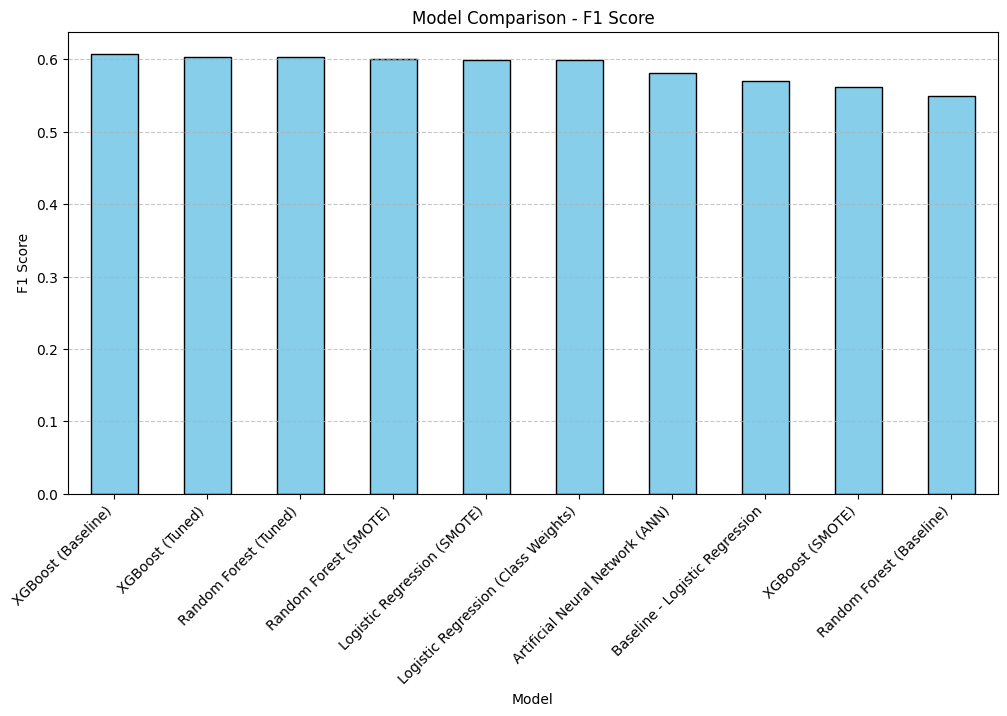

In [ ]:
import matplotlib.pyplot as plt

# Plot Comparison of F1 Scores
plt.figure(figsize=(12, 6))
results_df["F1 Score"].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Model Comparison - F1 Score")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


## Model Deployment

In [ ]:
import joblib

# Save the trained model
joblib.dump(best_xgb_final, "churn_prediction_xgb.pkl")


print("Model saved successfully!")


Model saved successfully!
